# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import helper
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST("~/.pytorch/F_MNIST_data/", download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST("~/.pytorch/F_MNIST_data/", download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

c:\Users\Matti\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(
100%|██████████| 26.4M/26.4M [00:01<00:00, 13.5MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 1.65MB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 10.1MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 808kB/s]


Here we can see one of the images.

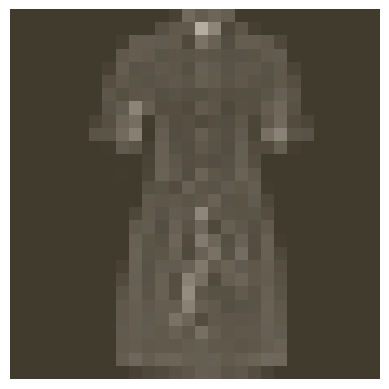

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0, :]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [ ]:
# TODO: Define your network architecture here
from torch.nn.functional import sigmoid, softmax

class MNISTNetwork(torch.nn.Module):
    """Basic Neural Network for MNIST classification."""
    def __init__(self) -> None:
        super().__init__()
        # 3 hidden layers
        self.fc1 = torch.nn.Linear(784, 256)
        self.fc2 = torch.nn.Linear(256, 128)
        self.fc3 = torch.nn.Linear(128, 64)
        self.out = torch.nn.Linear(64, 10) # Output layer

        # Activation function
        self.relu = torch.nn.ReLU()
        # Output function
        self.softmax = torch.nn.Softmax(dim=1)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """Forward pass through the network."""
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.out(x)
        return self.softmax(x) # Output

In [5]:
model = MNISTNetwork()

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [14]:
# TODO: Create the network, define the criterion and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

epochs = 10


In [15]:
# TODO: Train the network here
for _ in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()               # Clear the gradients, do this because gradients are accumulated

        output = model(images)              # Forward pass
        loss = criterion(output, labels)    # Calculate the loss
        loss.backward()                     # Backward pass
        running_loss += loss.item()         # Accumulate the loss
        optimizer.step()                    # Update weights with step
    else:
        print(f"Training loss: {running_loss / len(trainloader)}")

Training loss: 1.7121837158192958
Training loss: 1.684075749632138
Training loss: 1.6720695396476208
Training loss: 1.6644952059554647
Training loss: 1.6581907068996795
Training loss: 1.6537947062490337
Training loss: 1.6498464264595178
Training loss: 1.6471566416815655
Training loss: 1.6447516655616923
Training loss: 1.64163730685899


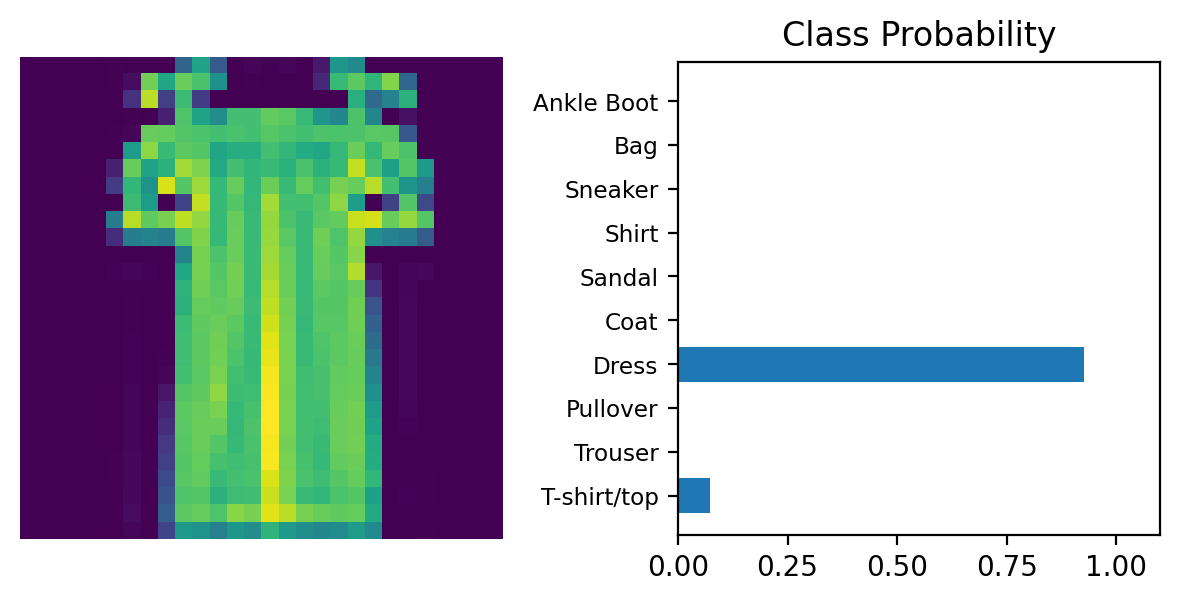

In [34]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = next(dataiter)
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = model(img)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version="Fashion")